# Week 6 Assignment
Find a regressor that will predict diamond prices better than the in-class regressor. It should have:
* Fewer errors > $2,500
* Fewer or no errors > 10% of price

The dataset to use is the diamond dataset (https://www.kaggle.com/shivam2503/diamonds).


## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/EMSE 6574/data'
!ls '/data/My Drive/EMSE 6574/data'

Drive already mounted at /data/; to attempt to forcibly remount, call drive.mount("/data/", force_remount=True).
datasets_1474_2639_IMDB-Movie-Data.csv	diamonds.csv


In [ ]:
import pandas as pd
diamonds = pd.read_csv(f'{data_dir}/diamonds.csv')
diamonds = diamonds.drop(columns = 'Unnamed: 0')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split into X and y
X = diamonds.drop(columns = 'price')
y = diamonds['price']

# Label-encode categorical variables
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {
    'I3': 0, 'I2': 1, 'I1': 2, 'SI2': 3, 'SI1': 4, 'VS2': 5, 'VS1': 6, 
    'VVS2': 7, 'VVS1': 8, 'IF': 9, 'FL': 10
}
X['cut_le'] = X['cut'].apply(lambda x: cut_mapping[x])
X['color_le'] = X['color'].apply(lambda x: color_mapping[x])
X['clarity_le'] = X['clarity'].apply(lambda x: clarity_mapping[x])

# Drop unncessary columns
X = X.drop(columns = ['cut', 'color', 'clarity'])

# Scale all the features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Do 80/20 split for the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

print(f'Training Shape: {X_train.shape}')
print(f'Testing Shape:  {X_test.shape}')

Training Shape: (43152, 9)
Testing Shape:  (10788, 9)


## Regression Modeling

### Model Fitting

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# Fit ridge regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# Get test predictions
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Fit LASSO regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Get test predictions
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
# Fit Random Forest regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Get test predictions
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Fit support vector regression model
sv_reg = SVR()
sv_reg.fit(X_train, y_train)

# Get test predictions
y_pred_svr = sv_reg.predict(X_test)

### Model Evaluation
Based on the distribution of errors below and RMSE, we are able to beat the in-class SVR by using a random forest regressor! 

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
print(f'In-Class Support Vector Regression RMSE: {mean_squared_error(y_test, y_pred_svr, squared = False)}')
print(f'Ridge Regression RMSE:                   {mean_squared_error(y_test, y_pred_ridge, squared = False)}')
print(f'LASSO Regression RMSE:                   {mean_squared_error(y_test, y_pred_lasso, squared = False)}')
print(f'Random Forest Regression RMSE:           {mean_squared_error(y_test, y_pred_rf, squared = False)}')

In-Class Support Vector Regression RMSE: 2785.8518721986725
Ridge Regression RMSE:                   1230.46609244888
LASSO Regression RMSE:                   1230.9287708264023
Random Forest Regression RMSE:           551.5666198688075


In [ ]:
errors_ridge = y_test - y_pred_ridge
errors_lasso = y_test - y_pred_lasso
errors_rf = y_test - y_pred_rf
errors_svr = y_test - y_pred_svr

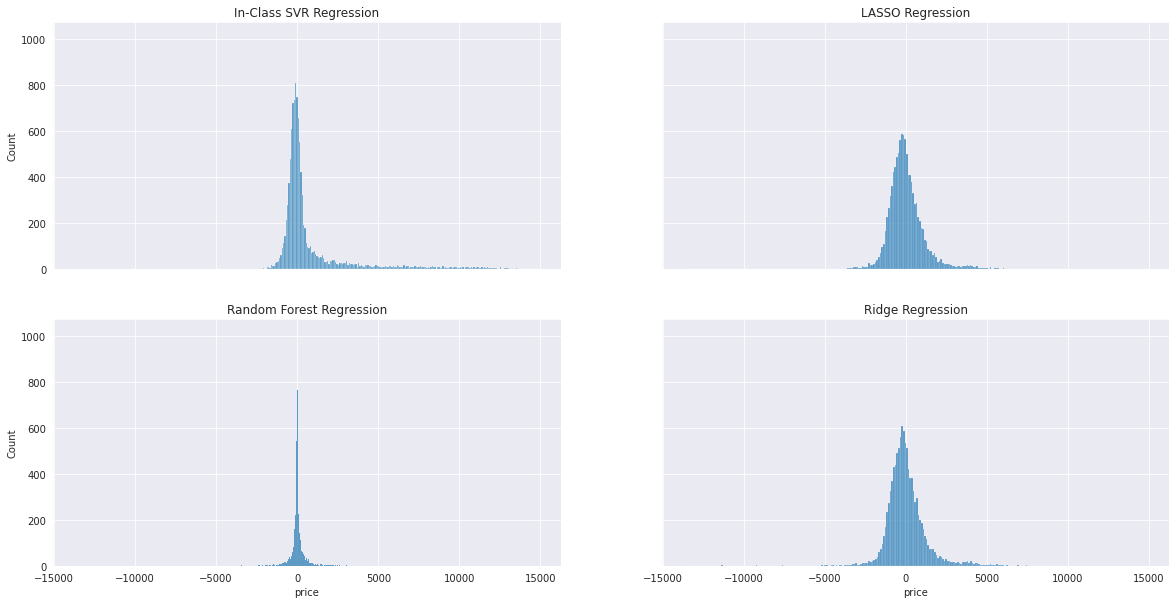

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10), sharex = True, sharey = True)
sns.histplot(errors_svr, ax = axs[0, 0]);
sns.histplot(errors_lasso, ax = axs[0, 1]);
sns.histplot(errors_rf, ax = axs[1, 0]);
sns.histplot(errors_ridge, ax = axs[1, 1]);
axs[0, 0].set_title('In-Class SVR Regression');
axs[0, 1].set_title('LASSO Regression');
axs[1, 0].set_title('Random Forest Regression');
axs[1, 1].set_title('Ridge Regression');